#forecasting time series data using facebook fbprophet
1. intro and installation
2.  data preprocessing  with time series 
3.  model fitting
4. obtaining the forecasts
5. plotting the forecasts
6. cross validation
7. computing performance matrics
8. visualize the performance MEtrics
9. conclusions

In [1]:
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#data wrangling
df = pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
df.drop(168,axis=0,inplace=True)

In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [8]:
df.columns=["ds","y"]

<AxesSubplot:>

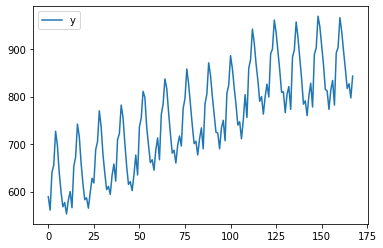

In [9]:
df.plot()

In [10]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [11]:
df["ds"]=pd.to_datetime(df["ds"])

In [12]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

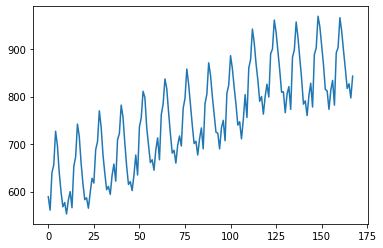

In [13]:
df["y"].plot()

In [17]:
#shifting to make stationary
df["y"]=df["y"]-df["y"].shift(1)

In [18]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,NaN
2,1962-03-01,107.0
3,1962-04-01,-63.0
4,1962-05-01,55.0


<AxesSubplot:>

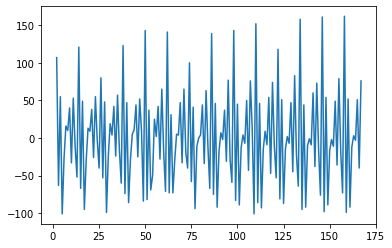

In [19]:
df["y"].plot()

In [20]:
from fbprophet import Prophet

In [21]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [22]:
# initialize the model
model=Prophet()

In [23]:
df.columns

Index(['ds', 'y'], dtype='object')

In [24]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [25]:
model.plot_components

<bound method Prophet.plot_components of <fbprophet.forecaster.Prophet object at 0x0000000006A37708>>

In [ ]:
#cross validation

In [28]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [30]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [31]:
# create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [34]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [38]:
#prediction
prediction=model.predict(future_dates)

In [39]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,-1.383119,-25.551859,2.459167,-1.383119,-1.383119,-10.408041,-10.408041,-10.408041,-10.408041,-10.408041,-10.408041,0.0,0.0,0.0,-11.791160
1,1962-02-01,-1.376259,-80.183919,-51.454376,-1.376259,-1.376259,-64.067427,-64.067427,-64.067427,-64.067427,-64.067427,-64.067427,0.0,0.0,0.0,-65.443686
2,1962-03-01,-1.370062,118.597056,147.211600,-1.370062,-1.370062,134.555992,134.555992,134.555992,134.555992,134.555992,134.555992,0.0,0.0,0.0,133.185930
3,1962-04-01,-1.363201,-94.153017,-64.821637,-1.363201,-1.363201,-78.174832,-78.174832,-78.174832,-78.174832,-78.174832,-78.174832,0.0,0.0,0.0,-79.538034
4,1962-05-01,-1.356562,29.571827,58.987366,-1.356562,-1.356562,46.591254,46.591254,46.591254,46.591254,46.591254,46.591254,0.0,0.0,0.0,45.234692


In [40]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,45.163898,30.353913,58.850967
529,1976-11-27,50.362446,36.197231,64.898355
530,1976-11-28,55.574547,40.886331,70.459219
531,1976-11-29,60.691231,46.766138,75.440368
532,1976-11-30,65.595493,49.392494,79.662967


# forecasting

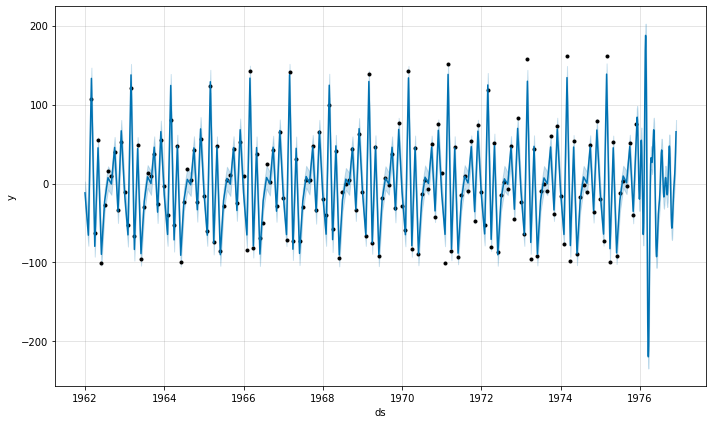

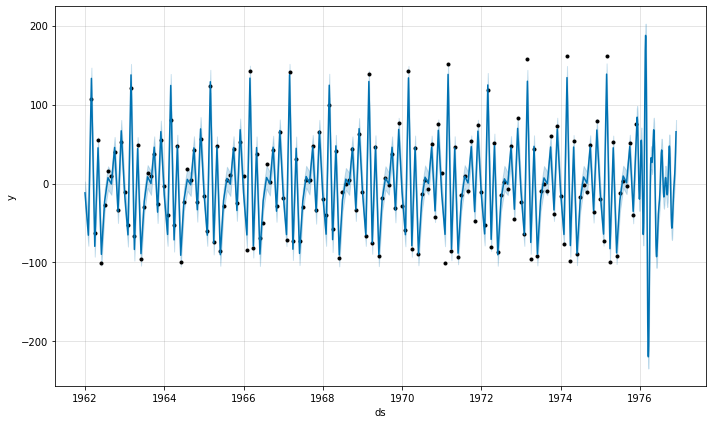

In [35]:
# plot the predicted  projection 
model.plot(prediction)

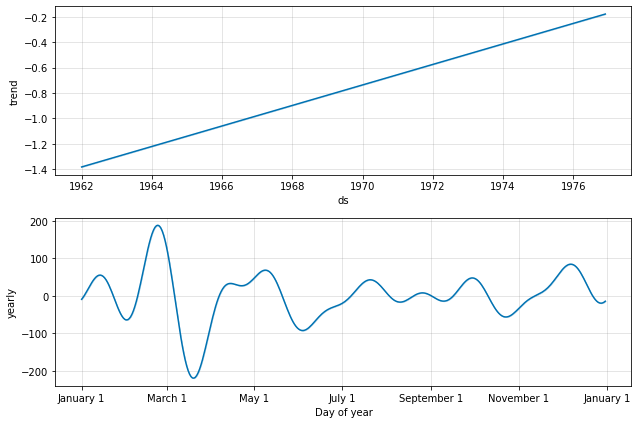

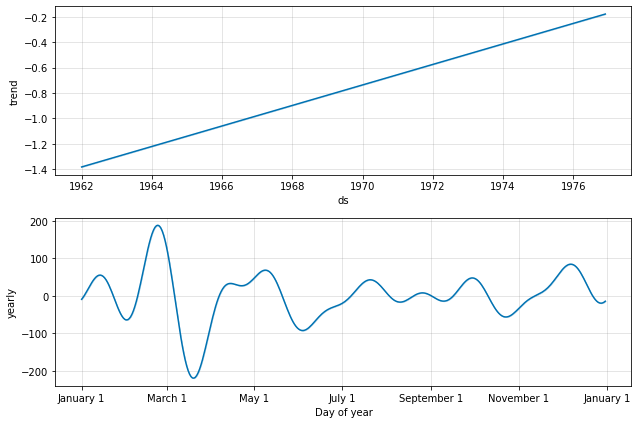

In [36]:
# visualize each  components [Trends , weekly]
model.plot_components(prediction)

# cross validation

In [44]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,initial="1095 days", period="180 days", horizon="365 days")
df_cv.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00
C:\Users\admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\admin\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecat

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,15.761151,7.893691,23.739593,5.0,1965-07-21
1,1965-09-01,5.062423,-2.697058,12.607498,11.0,1965-07-21
2,1965-10-01,40.248283,32.468794,47.975575,44.0,1965-07-21
3,1965-11-01,-26.454597,-34.373808,-19.101363,-25.0,1965-07-21
4,1965-12-01,57.067674,49.755879,64.955324,52.0,1965-07-21


In [45]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,15.761151,7.893691,23.739593,5.0,1965-07-21
1,1965-09-01,5.062423,-2.697058,12.607498,11.0,1965-07-21
2,1965-10-01,40.248283,32.468794,47.975575,44.0,1965-07-21
3,1965-11-01,-26.454597,-34.373808,-19.101363,-25.0,1965-07-21
4,1965-12-01,57.067674,49.755879,64.955324,52.0,1965-07-21


In [46]:
#perpormance matrics
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,41 days,265.181708,16.284401,13.123489,0.480259,0.541667
1,42 days,246.587674,15.703110,12.332102,0.480259,0.583333
2,43 days,277.415383,16.655791,12.993921,0.465924,0.583333
3,46 days,254.774309,15.961651,12.355298,0.453757,0.625000
4,47 days,251.491334,15.858478,12.193013,0.453757,0.645833


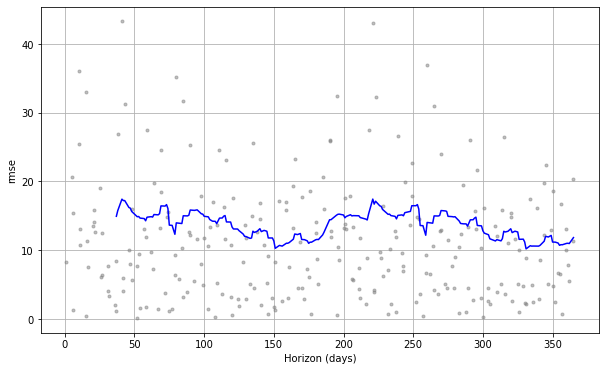

In [43]:
from fbprophet.plot import plot_cross_validation_metric
fig= plot_cross_validation_metric(df_cv,metric='rmse')